# Description
This notebook is showing how Simulation API could be used in a notebook style. The short notebook is displaying how to create a simulation and visualize its report

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from collections import namedtuple

In [2]:
url = "http://localhost:8080"

In [3]:
create_url = url + "/simulation"

In [4]:
report_url = url + '/report'

# Create Simulation

In [5]:
payload = '{"name":"Some name 2","description":"Some description","topology":{"application-servers":[{"name":"App Server 1","cpu_units":1,"memory_units":2048},{"name":"App Server 2","cpu_units":1,"memory_units":2048}],"database-servers":[{"name":"DB Server 1","disk_units":5120}]},"scenario":{"duration_days":10,"step_avg":5,"login_percentage":0.2}}'

In [6]:
headers = {
    'content-type': "application/json"
    }

In [53]:
response = requests.request("POST", create_url, data=payload, headers=headers)
response # should be 201 - Created

<Response [201]>

In [45]:
response.text # copy paste runtime_id to query string

'{"runtime_id":"93ef2a8e36b511eaa00aacde48001122","success":"Simulation created"}\n'

# Read Report

In [7]:
querystring = {"runtime_id": "fa075460387011eaa1d2acde48001122"}

In [8]:
response = requests.request("GET", report_url, params=querystring)
response # should be 200

<Response [200]>

In [11]:
# response.text

In [9]:
report = json.loads(response.text, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))

ValueError: Type names and field names must be valid identifiers: '0'

In [137]:
# report.report[1]

# Visualize Report

In [138]:
def visualize_metrics(data, title="Usage"):
    data_frame = pd.DataFrame(data,
                              columns=["step", "usage", "queue"])
    data_frame = data_frame.groupby(["step"]).max()
    # data_frame.to_csv('rep.csv')

    plt.subplot(2, 1, 1)
    plt.plot(data_frame["usage"])
    plt.title(title)
    plt.margins()
    plt.subplot(2, 1, 2)
    plt.plot(data_frame["queue"])
    plt.title("Requests in queue")
    plt.subplots_adjust(hspace=0.5)
    plt.show()

## Server 1

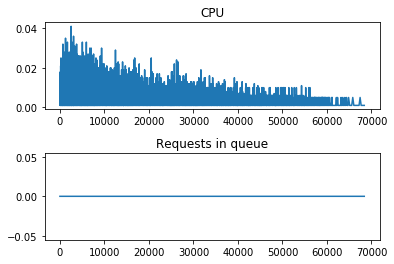

In [139]:
visualize_metrics(report.report[0].metrics.cpu, "CPU")

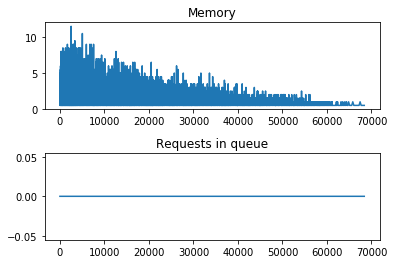

In [140]:
visualize_metrics(report.report[0].metrics.memory, "Memory")

## Server 2  

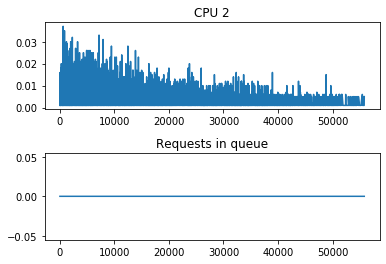

In [141]:
visualize_metrics(report.report[1].metrics.cpu, "CPU 2")

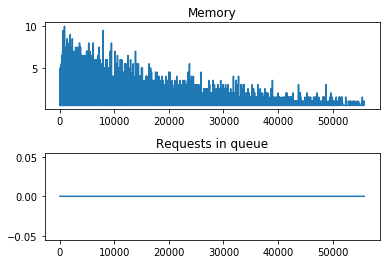

In [142]:
visualize_metrics(report.report[1].metrics.memory, "Memory")